## Context
Your goal: wrangle WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations. The Twitter archive is great, but it only contains very basic tweet information. Additional gathering, then assessing and cleaning is required for "Wow!"-worthy analyses and visualizations.

## Key Points
Key points to keep in mind when data wrangling for this project:

- You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
- Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are **only to assess and clean at least 8 quality issues and at least 2 tidiness issues** in this dataset.
- Cleaning includes merging individual pieces of data according to the rules of tidy data.
- The fact that the rating numerators are greater than the denominators does not need to be cleaned. This unique rating system is a big part of the popularity of WeRateDogs.
- You do **not** need to gather the tweets **beyond August 1st, 2017**. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.


## Project Details
Your tasks in this project are as follows:

Data wrangling, which consists of:

- Gathering data (downloadable file in the Resources tab in the left most panel of your classroom and linked in step 1 below).
- Assessing data
- Cleaning data
- Storing, analyzing, and visualizing your wrangled data

Reporting on 1) your data wrangling efforts and 2) your data analyses and visualizations

---
## Project Works from here

<a id = 'workflow'></a>
### Table of Contents (Workflow):

- [Gathering data](#gather)
- [Assessing data](#assess)
    - [Summary after assessment](#summary)
- [Cleaning data](#cleaning)
    - [Tidiness Issues](#tidy)
    - [Quality Issues](#quality)
- [Storing data](#store)
- [Analyzing and visualizing data](#analysis)

<a id = 'gather'></a>
## Gathering Data for this Project

Gather each of the three pieces of data as described below in a Jupyter Notebook titled **wrangle_act.ipynb**:

`1.` The WeRateDogs Twitter archive. I am giving this file to you, so imagine it as a file on hand. Download this file manually by clicking the following link: **twitter_archive_enhanced.csv**

`2.` The tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file (image_predictions.tsv) is hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

`3.` Each tweet's retweet count and favorite ("like") count at minimum, and any additional data you find interesting. Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's **Tweepy** library and store each tweet's entire set of JSON data in a file called **tweet_json.txt** file. Each tweet's JSON data should be written to its own line. Then read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count. Note: do not include your Twitter API keys, secrets, and tokens in your project submission.

In [1]:
import pandas as pd
import numpy as np
import requests
import json
import tweepy
import re
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
pd.options.display.min_rows = 999
pd.options.display.max_columns = 999

### `1.` gather a file on hand

In [3]:
tweet_archive = pd.read_csv('data/twitter-archive-enhanced.csv')

In [4]:
tweet_archive.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


In [5]:
tweet_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

### `2` image_predctions.tsv on a web server

In [6]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

In [7]:
response = requests.get(url)
response.status_code

200

In [8]:
with open('image_predictions.tsv', 'wb') as file:
    file.write(response.content)

In [9]:
image_prediction = pd.read_csv('data/image_predictions.tsv', sep = '\t')

In [10]:
image_prediction.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


In [11]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### `3` tweepy api

In [12]:
tweet_count = []

with open('tweet-json.txt','r') as file:
    for data in file:
        data = json.loads(data)
        
        tweet_count.append({'tweet_id': data['id'],
                           'retweet_count': data['retweet_count'],
                           'favorite_count': data['favorite_count']})

In [13]:
tweet_count[:5]

[{'tweet_id': 892420643555336193,
  'retweet_count': 8853,
  'favorite_count': 39467},
 {'tweet_id': 892177421306343426,
  'retweet_count': 6514,
  'favorite_count': 33819},
 {'tweet_id': 891815181378084864,
  'retweet_count': 4328,
  'favorite_count': 25461},
 {'tweet_id': 891689557279858688,
  'retweet_count': 8964,
  'favorite_count': 42908},
 {'tweet_id': 891327558926688256,
  'retweet_count': 9774,
  'favorite_count': 41048}]

In [14]:
tweet_count = pd.DataFrame(tweet_count)
tweet_count.head(5)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


---
<a id = 'assess'></a>
## Assessing Data for this Project
After gathering each of the above pieces of data, assess them visually and programmatically for quality and tidiness issues. Detect and document **at least eight (8) quality issues and two (2) tidiness issues** in your wrangle_act.ipynb Jupyter Notebook. To meet specifications, the issues that satisfy the Project Motivation (see the Key Points header on the previous page) must be assessed.


In [15]:
tweet_archive.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1537,689877686181715968,NaN,NaN,2016-01-20 18:30:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Durg. He's trying to conquer his fear ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/689877686...,9,10,Durg,None,None,None,None
1547,689280876073582592,NaN,NaN,2016-01-19 02:59:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Herald. He wants you to know he could ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/689280876...,10,10,Herald,None,None,None,None
1886,674790488185167872,NaN,NaN,2015-12-10 03:19:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",ER... MER... GERD 13/10 https://t.co/L1puJISV1a,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674790488...,13,10,None,None,None,None,None
1771,678334497360859136,NaN,NaN,2015-12-19 22:02:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Rosie. She has a snazzy bow tie and a ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/678334497...,10,10,Rosie,None,None,None,None
1825,676470639084101634,NaN,NaN,2015-12-14 18:35:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Three generations of pupper. 11/10 for all htt...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676470639...,11,10,None,None,None,pupper,None
11,889880896479866881,NaN,NaN,2017-07-25 16:11:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bruno. He is a service shark. Only get...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889880896...,13,10,Bruno,None,None,None,None
2026,671879137494245376,NaN,NaN,2015-12-02 02:30:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Brad. He's a chubby lil pup. Doesn't r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671879137...,5,10,Brad,None,None,None,None
1715,680221482581123072,NaN,NaN,2015-12-25 03:00:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is CeCe. She's patiently waiting for Sant...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680221482...,10,10,CeCe,None,None,None,None
99,872967104147763200,NaN,NaN,2017-06-09 00:02:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a very large dog. He has a date later. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/872967104...,12,10,None,doggo,None,None,None
387,826598799820865537,8.265984e+17,4.196984e+09,2017-02-01 01:11:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I was going to do 007/10, but the joke wasn't ...",NaN,NaN,NaN,NaN,7,10,None,None,None,None,None


In [16]:
tweet_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [1]:
# tweet_archive.rating_numerator.value_counts()

In [2]:
# tweet_archive.tweet_id.sort_values()

In [19]:
tweet_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [3]:
# tweet_archive[tweet_archive.rating_denominator != 10]

In [21]:
image_prediction.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
933,703356393781329922,https://pbs.twimg.com/media/CcLS6QKUcAAUuPa.jpg,1,Border_collie,0.894842,True,collie,0.097364,True,English_springer,0.003037,True
1972,869596645499047938,https://pbs.twimg.com/media/DBFtiYqWAAAsjj1.jpg,1,Chihuahua,0.955156,True,toy_terrier,0.008054,True,muzzle,0.006296,False
1050,713900603437621249,https://pbs.twimg.com/media/CehIzzZWQAEyHH5.jpg,1,golden_retriever,0.371816,True,cocker_spaniel,0.177413,True,Irish_setter,0.092725,True
415,674014384960745472,https://pbs.twimg.com/media/CVqUgTIUAAUA8Jr.jpg,1,Pembroke,0.742320,True,Cardigan,0.084937,True,Eskimo_dog,0.068321,True
1758,825535076884762624,https://pbs.twimg.com/media/C3TjvitXAAAI-QH.jpg,1,Rottweiler,0.681495,True,Tibetan_mastiff,0.147940,True,black-and-tan_coonhound,0.024525,True
326,671891728106971137,https://pbs.twimg.com/media/CVMJ9guXAAAhAiK.jpg,1,Labrador_retriever,0.567933,True,golden_retriever,0.349401,True,seat_belt,0.069396,False
416,674019345211760640,https://pbs.twimg.com/media/CVqZBO8WUAAd931.jpg,1,collie,0.992732,True,borzoi,0.005043,True,Shetland_sheepdog,0.001725,True
1614,802239329049477120,https://pbs.twimg.com/media/CyIgaTEVEAA-9zS.jpg,2,Eskimo_dog,0.482498,True,Siberian_husky,0.335774,True,malamute,0.134589,True
29,666411507551481857,https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg,1,coho,0.404640,False,barracouta,0.271485,False,gar,0.189945,False
399,673686845050527744,https://pbs.twimg.com/media/CVlqi_AXIAASlcD.jpg,1,Pekinese,0.185903,True,guinea_pig,0.172951,False,pug,0.166183,True


<a id = 'summary'></a>
### Summary After Assessment

### Quality

1. missing data in 'expanded_urls' column (2297 vs 2356) 
2. NaN in in_reply_to_status_id, in_reply_to_user_id columns (78 rows with non_null: replys)
3. NaN in retweeted_status_id, retweet4ed_status_user_id, retweeted_status_timestamp (181 rows with non-null: retweets)
4. erroneous data types: 
    - tweet_id, in_reply_to_status_id, in_reply_to_user_id,retweeted_status_id, retweet4ed_status_user_id   
    - 'timestamp'(for inspecting tweets beyond August 1st, 2017)
5. source column with '<a href= >' tag
6. some values in 'rating_denominator' are not equal to 10 
7. incorrect dog names
8. multiple / incorrect urls in 'expanded_urls' column

#### `tweet_archive` table
9. some rows contains images that are not dogs
 
### Tidiness
- `tweet_archive` table: doggo, floofer, pupper, puppo are 'dog_stage': one variable
- `tweet_count` table: same observational unit as `tweet_archive` table
- we need tweet_id with images: `image_prediction` table has all the necessary images

[Go back to Table of Contents](#workflow)

---
<a id = 'cleaning'></a>
## Cleaning Data for this Project
Clean each of the issues you documented while assessing. Perform this cleaning in wrangle_act.ipynb as well. The result should be a high quality and tidy master pandas DataFrame (or DataFrames, if appropriate). Again, the issues that satisfy the Project Motivation must be cleaned.

In [22]:
tweet_archive_clean = tweet_archive.copy()
image_prediction_clean = image_prediction.copy()
tweet_count_clean = tweet_count.copy()

<font color='red'> table name for cleaning is changed to '_clean'</font>

<a id = 'tidy'></a>
### Tidiness Issues
- `tweet_archive_clean` table: doggo, floofer, pupper, puppo are 'dog_stage': one variable
- `tweet_count_clean` table: same observational unit as `tweet_archive_clean` table
- we need tweet_id with images: `image_prediction_clean` table has all the necessary images

### `T1.` `tweet_archive_clean` table: doggo, floofer, pupper, puppo are 'dog_stage': one variable

##### define
- change 'None' to ''(blank) and concatenate the 4 columns into a new column 'stage'.
- drop the 4 columns after creating 'stage' column

In [23]:
stage_name = ['doggo','floofer','pupper','puppo']

In [24]:
for stage in stage_name:
    print(tweet_archive_clean[stage].value_counts())

None     2259
doggo      97
Name: doggo, dtype: int64
None       2346
floofer      10
Name: floofer, dtype: int64
None      2099
pupper     257
Name: pupper, dtype: int64
None     2326
puppo      30
Name: puppo, dtype: int64


##### code: 
to replace str 'None' to blank ('')

In [25]:
for stage in stage_name:
        tweet_archive_clean[stage] = tweet_archive_clean[stage].replace(to_replace = 'None',\
                                                                        value = '')

##### test
'None' changed to blank 

In [26]:
for stage in stage_name:
    print(tweet_archive_clean[stage].value_counts(dropna = False))

         2259
doggo      97
Name: doggo, dtype: int64
           2346
floofer      10
Name: floofer, dtype: int64
          2099
pupper     257
Name: pupper, dtype: int64
         2326
puppo      30
Name: puppo, dtype: int64


##### code: 
to concatenate the 4 columns

In [27]:
tweet_archive_clean['stage'] = (tweet_archive_clean['doggo'] 
                                + tweet_archive_clean['floofer'] 
                                + tweet_archive_clean['pupper'] 
                                + tweet_archive_clean['puppo'])

##### test
all 4 columns concatenated into 'stage' column

##### re-assess
- double entries (like doggopupper)
- 1976 'blank' is not helpful for further data use

In [28]:
tweet_archive_clean['stage'].value_counts()

                1976
pupper           245
doggo             83
puppo             29
doggopupper       12
floofer            9
doggofloofer       1
doggopuppo         1
Name: stage, dtype: int64

##### code: 
to seperate double entry (i.e. doggopupper) with ','

In [29]:
tweet_archive_clean['stage'] = tweet_archive_clean['stage'].str.replace('doggopupper','doggo, pupper')
tweet_archive_clean['stage'] = tweet_archive_clean['stage'].str.replace('doggofloofer','doggo, floofer')
tweet_archive_clean['stage'] = tweet_archive_clean['stage'].str.replace('doggopuppo','doggo, puppo')

In [30]:
tweet_archive_clean['stage'].value_counts()

                  1976
pupper             245
doggo               83
puppo               29
doggo, pupper       12
floofer              9
doggo, floofer       1
doggo, puppo         1
Name: stage, dtype: int64

##### code: 
to replace ''(blank) with np.nan for later use

In [31]:
tweet_archive_clean.loc[tweet_archive_clean['stage'] == '','stage'] = np.nan

In [32]:
tweet_archive_clean['stage'].value_counts(dropna = False)

NaN               1976
pupper             245
doggo               83
puppo               29
doggo, pupper       12
floofer              9
doggo, floofer       1
doggo, puppo         1
Name: stage, dtype: int64

##### code: 
to drop the 4 columns ('stage_name' as below)

In [33]:
stage_name

['doggo', 'floofer', 'pupper', 'puppo']

In [34]:
tweet_archive_clean.drop(columns = stage_name, inplace = True)

##### test
`T1.` `tweet_archive_clean` table: doggo, floofer, pupper, puppo are 'dog_stage': one variable

In [35]:
# stage columns - initially 394 entries from 4 columns, now to 380 (14 double entries into account)
tweet_archive_clean.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  stage                       380 n

### `T2.` `tweet_count` table: same observational unit as `tweet_archive` table

In [36]:
tweet_archive_clean.shape

(2356, 14)

In [37]:
tweet_count_clean.shape

(2354, 3)

In [38]:
tweet_count_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


##### define: 
inner merge `tweet_archive_clean` and `tweet_count_clean` on 'tweet_id' and shorten the table name `tweet_archive_clean` as `tweet_clean` for convenience

inner marge to drop as tweet_ids that do not contain the two key variables (retweet_count, favorite_count), but still check if the result is significant after the merge

##### code

In [39]:
tweet_clean = pd.merge(left = tweet_archive_clean, right = tweet_count_clean, 
                       left_on= 'tweet_id', right_on= 'tweet_id')

##### text
non_null tweet_id, retweet_count, favorite_count -> 2354, okay 

In [40]:
tweet_clean.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 2353
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2354 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2354 non-null   object 
 4   source                      2354 non-null   object 
 5   text                        2354 non-null   object 
 6   retweeted_status_id         179 non-null    float64
 7   retweeted_status_user_id    179 non-null    float64
 8   retweeted_status_timestamp  179 non-null    object 
 9   expanded_urls               2295 non-null   object 
 10  rating_numerator            2354 non-null   int64  
 11  rating_denominator          2354 non-null   int64  
 12  name                        2354 non-null   object 
 13  stage                       379 n

### `T3.` we need tweet_id with images: `image_prediction` table has all the necessary images

In [41]:
image_prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


##### define: 
left merge `tweet_clean` to `image_prediction_clean`  on 'tweet_id'. row data that do not have image_predictions information would be dropped as a result

##### code: 

In [42]:
tweet_clean = pd.merge(left = image_prediction_clean, right = tweet_clean, how = 'left', 
                       left_on = 'tweet_id', right_on = 'tweet_id')

##### test:

In [43]:
tweet_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage,retweet_count,favorite_count
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8.0,10.0,None,NaN,532.0,2535.0
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7.0,10.0,a,NaN,48.0,132.0
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9.0,10.0,a,NaN,47.0,128.0
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6.0,10.0,a,NaN,147.0,311.0
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5.0,10.0,None,NaN,41.0,111.0


In [4]:
# tweet_clean.info()

[Go back to Table of Contents](#workflow)

<a id = 'quality'></a>
### Quality

1. missing data in 'expanded_urls' column (2297 vs 2356) 
2. NaN in in_reply_to_status_id, in_reply_to_user_id columns (78 rows with non_null: replys)
3. NaN in retweeted_status_id, retweet4ed_status_user_id, retweeted_status_timestamp (181 rows with non-null: retweets)
4. erroneous data types: 
    - tweet_id, in_reply_to_status_id, in_reply_to_user_id,retweeted_status_id, retweet4ed_status_user_id   
    - 'timestamp'(for inspecting tweets beyond August 1st, 2017)
    - 'retweet count' and favorite count -> int
5. source column with '<a href= >' tag
6. some values in 'rating_denominator' are not equal to 10 
7. missing / incorrect dog names
8. inconsistent 'expanded_urls' column
9. some rows contains images that are not dogs

### `Q1.` missing data in 'expanded_urls' column (2297 vs 2356) 

In [45]:
tweet_clean[tweet_clean.expanded_urls.isnull()] 

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage,retweet_count,favorite_count
1413,771004394259247104,https://pbs.twimg.com/media/CrMmVqyWcAIDCHI.jpg,1,home_theater,0.414338,False,iPod,0.052741,False,pop_bottle,0.048821,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2055,888202515573088257,https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg,2,Pembroke,0.809197,True,Rhodesian_ridgeback,0.054950,True,beagle,0.038915,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### define
After merging, there are two rows that have null values. As they don't have information about 'retweet_count' and 'favorite_count' (our key data). Drop the 2 rows.

##### code

In [46]:
tweet_clean = tweet_clean[tweet_clean.expanded_urls.notnull()] 

##### test

In [9]:
# tweet_clean.info() # 2073 after removing the 2 rows

### `Q2.` in_reply_to_status_id, in_reply_to_user_id columns: 78 rows with non_null data indicates the tweets are actually ‘replies’

##### Inspired by a Udacity Knowledge thread https://knowledge.udacity.com/questions/79100

##### define
Inspect the rows with non_null values first. Drop them for the sake of quality data with original tweets

In [48]:
len(tweet_clean[tweet_clean['in_reply_to_status_id'].notnull()]) # 23 entries 

23

In [49]:
len(tweet_clean)

2073

##### code 
to drop the rows that contain replys (23 rows)

In [50]:
tweet_clean = tweet_clean[tweet_clean['in_reply_to_status_id'].isnull()]

##### test

In [8]:
# tweet_clean.info() 

##### code
then to remove 'in_reply_to_status_id', 'in_reply_to_user_id' columns with no data entries

In [52]:
tweet_clean = tweet_clean.drop(columns = ['in_reply_to_status_id', 'in_reply_to_user_id'])

##### test

In [7]:
# tweet_clean.info()

### `Q3.` retweeted_status_id, retweet4ed_status_user_id, retweeted_status_timestamp : 181 rows with non-null data are ‘retweets’

##### define

We are interested in getting original tweets (no retweets) so remove the 79 rows with non-null values in retweeted_status_id (retweeted_status_user_id, retweeted_status_timestamp) column. Then, drop the three columns as they should be filled with unnecessary 0 non-null values - check before removing them

In [5]:
# tweet_clean[tweet_clean['retweeted_status_id'].notnull()] # text column all starts with RT @

##### code

In [55]:
tweet_clean = tweet_clean[tweet_clean['retweeted_status_id'].isnull()]

##### test

In [6]:
# tweet_clean.info() # 0 non-null values for the three columns

##### code

In [57]:
tweet_clean = tweet_clean.drop(columns = ['retweeted_status_id', 
                                          'retweeted_status_user_id', 
                                          'retweeted_status_timestamp'])

##### test

In [10]:
# tweet_clean.info()

### `Q4.` erroneous data types: 

##### define
- tweet_id -> use astype to transform into string
- retweet_count, favorite count -> use astype to transform into int
- timestamp -> use to_datetime to transform into datetime object.
- timetstamp -> inspect if all date are not beyond August 1st, 2017 (< '2017-08-01')


##### code

In [59]:
tweet_clean.tweet_id = tweet_clean.tweet_id.astype(str)

In [60]:
tweet_clean.retweet_count = tweet_clean.retweet_count.astype(int)
tweet_clean.favorite_count = tweet_clean.favorite_count.astype(int)

In [61]:
tweet_clean['timestamp'] = pd.to_datetime(tweet_clean['timestamp'])

In [62]:
tweet_clean[tweet_clean['timestamp'] > '2017-08-02'] # checking dates beyond Aug 1 2017

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,retweet_count,favorite_count


##### test

In [11]:
# tweet_clean.info()

### `Q5.` source column with '<a href= ></a>' tag

##### reassess
before applying the regex to all, test it with a few text first. Also, compare before and after counts by using value_counts() method to check if all entries are still correctly placed

##### define

create a regex to pull <a href></a> tag out of the text, and replace them with blank(' ').

In [64]:
#format
tweet_clean.source[1]

'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'

In [65]:
#test - regex
tweet_clean.source[1:10].str.replace(r'(?:^<a[\s\w=":/".]+>)|(?:[</a]+>)','', regex = True)

1    Twitter for iPhone
2    Twitter for iPhone
3    Twitter for iPhone
4    Twitter for iPhone
5    Twitter for iPhone
6    Twitter for iPhone
7    Twitter for iPhone
8    Twitter for iPhone
9    Twitter for iPhone
Name: source, dtype: object

In [66]:
# for the test purpose: value_counts() - before applying the regrex
# 1932 Twitter for iPhone, 28 Twitter Web Client # 11 TweetDeck
tweet_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1932
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       28
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

##### code

In [67]:
tweet_clean.source = tweet_clean.source.str.replace(r'(?:^<a[\s\w=":/".]+>)|(?:[</a]+>)','', 
                                                    regex = True)

##### test
value_counts - after the regex replacement, correct!

In [68]:
tweet_clean.source.value_counts() 

Twitter for iPhone    1932
Twitter Web Client      28
TweetDeck               11
Name: source, dtype: int64

### `Q6.` some values in 'rating_denominator' are not equal to 10 


##### reassess
inspect again all the rows with 'rating_denominator' != 10, and 'text' column. 

##### define
use a regex expression to pull more than one rating values ([\d]+/[\d+]) from the text, then replace.

##### Inspired by a Udacity Knowledge thread: https://knowledge.udacity.com/questions/110847

In [69]:
suspect_denom = tweet_clean[tweet_clean['rating_denominator'] != 10]

In [70]:
suspect_denom['text'].iloc[0]

'This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv'

##### code

In [71]:
# rows that the rating format repeats twice
# second columns should be the correc rating
correct_denom = suspect_denom['text'].str.extract(r'([\d]+/[\d]+){1}.*?([\d]+/[\d]+)', expand = True).iloc[:,1].str.split('/')
correct_denom = correct_denom[correct_denom.notnull()]

In [72]:
for index in list(correct_denom.index):
    tweet_clean.loc[index, 'rating_numerator'] = float(correct_denom.loc[index][0])
    tweet_clean.loc[index, 'rating_denominator'] = float(correct_denom.loc[index][1])

##### test

In [73]:
tweet_clean.loc[list(correct_denom.index)][['rating_numerator','rating_denominator']]

,rating_numerator,rating_denominator
20,9.0,10.0
667,10.0,10.0
1071,11.0,10.0
1105,13.0,10.0
1196,14.0,10.0


##### reassess
Create a new column with the calculated rating (rating_numerator / rating_denominator) and name it as 'rating_cal'. Compare a rating shown in the 'text' column. 

index 1658: ratings are wrongly pulled (24/7 to indicate time object instead of rating). No rating data available so remove the row.

In [74]:
tweet_clean['rating_cal'] = tweet_clean['rating_numerator'] / tweet_clean['rating_denominator']

In [12]:
# tweet_clean['rating_cal'].value_counts().sort_index(ascending = False)

In [13]:
# tweet_clean[tweet_clean['rating_cal'] > 1.4].sort_values(by = 'rating_cal', ascending = False)

##### code
to remove index 1658

In [77]:
tweet_clean = tweet_clean.drop(index = 1658)

In [14]:
# tweet_clean[tweet_clean['rating_cal'] > 1.4]

#### code
remove 'rating_cal' column that was used for cleaning purpose

In [79]:
tweet_clean = tweet_clean.drop(columns = 'rating_cal')

##### test

In [80]:
('rating_cal') in tweet_clean.columns

False

### `Q7` incorrect dog names

##### reassess 
Some names are 'None', 'a', 'an', 'the'. 

In [81]:
pd.set_option('display.max_colwidth', 100)

In [15]:
# tweet_clean.name.value_counts()

In [83]:
# sorting by incorrect names
name_none = tweet_clean[tweet_clean['name'] == 'None'][['text','name']]
name_a = tweet_clean[tweet_clean['name'] == 'a'][['text','name']]
name_an = tweet_clean[tweet_clean['name'] == 'an'][['text','name']]
name_the = tweet_clean[tweet_clean['name'] == 'the'][['text','name']]

In [16]:
name_none[1:10] #contains'We only rate dogs', postings that are not related to dog

NameError: name 'name_none' is not defined

##### define
Some names that contain 'None' are not related to dogs: 'We only rate dogs', 'don't send' in text indicate that they are just _jokes_ so drop them first.

In [85]:
tweet_clean.shape[0]

1970

In [86]:
# contains 'we only rate dogs' (including 'don't send' text)
tweet_clean[(tweet_clean.text.str.contains('We only rate dogs'))].shape[0] # 48 entries

48

In [87]:
# drop the rows that contain 'we only rate dogs' 
tweet_clean = tweet_clean[~(tweet_clean.text.str.contains('We only rate dogs'))]

In [88]:
tweet_clean[tweet_clean.text.str.contains('don\'t send')].shape[0] # 3 entries elft

3

In [89]:
tweet_clean = tweet_clean[~(tweet_clean.text.str.contains('don\'t send'))]

In [90]:
tweet_clean.shape[0]

1919

##### re-assess  
name_a, name_an, name_the

In [17]:
name_a[1:10] # some texts that have real names after 'named '

NameError: name 'name_a' is not defined

In [92]:
name_an # not a dog post again (#1234)

,text,name
6,This is an odd dog. Hard on the outside but loving on the inside. Petting still fun. Doesn't pla...,an
20,This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on ...,an
22,This is an extremely rare horned Parthenon. Not amused. Wears shoes. Overall very nice. 9/10 wou...,an
149,This is an Irish Rigatoni terrier named Berta. Completely made of rope. No eyes. Quite large. Lo...,an
930,This is an East African Chalupa Seal. We only rate dogs. Please only send in dogs. Thank you... ...,an
1234,This is an Iraqi Speed Kangaroo. It is not a dog. Please only send in dogs. I'm very angry with ...,an


In [93]:
tweet_clean[tweet_clean.text.str.contains('not a dog')]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,retweet_count,favorite_count
1234,746369468511756288,https://pbs.twimg.com/media/ClujESVXEAA4uH8.jpg,1,German_shepherd,0.622957,True,malinois,0.338884,True,wallaby,0.024161,False,2016-06-24 15:48:42+00:00,Twitter for iPhone,This is an Iraqi Speed Kangaroo. It is not a dog. Please only send in dogs. I'm very angry with ...,https://twitter.com/dog_rates/status/746369468511756288/photo/1,9.0,10.0,an,NaN,1854,6637


In [94]:
name_the # none particular

,text,name
9,Here is the Rand Paul of retrievers folks! He's probably good at poker. Can drink beer (lol rad)...,the
10,This is the happiest dog you will ever see. Very committed owner. Nice couch. 10/10 https://t.co...,the
313,This is the best thing I've ever seen so spread it like wildfire &amp; maybe we'll find the geni...,the
526,This is the saddest/sweetest/best picture I've been sent. 12/10 😢🐶 https://t.co/vQ2Lw1BLBF,the
543,This is the happiest pupper I've ever seen. 10/10 would trade lives with https://t.co/ep8ATEJwRb,the
720,This is the newly formed pupper a capella group. They're just starting out but I see tons of pot...,the
786,Stop sending in lobsters. This is the final warning. We only rate dogs. Thank you... 9/10 https:...,the


##### define
- replace 'None' in `name` column with np.nan
- replace 'a', 'an', 'the' in `name` column names with np.nan: they are retrieved from the text that starts as "This is a/an/the ...". 
- drop rows that contains 'not a dog' 

##### [note] no further replacement of the names as I am not interested yet to use 'name' for the analysis purpose.

##### code

In [95]:
tweet_clean.name = tweet_clean.name.replace('None', np.nan)

In [96]:
tweet_clean.name.str.contains('None').sum()

0

In [97]:
len(tweet_clean[tweet_clean.name == 'the'])

6

In [98]:
tweet_clean.name = tweet_clean.name.replace(r'(^a{1}n?$)', np.NaN, regex = True)
tweet_clean.name = tweet_clean.name.replace(r'(^the$)', np.NaN, regex = True)

In [99]:
# drop a row that contains 'not a dog'
tweet_clean = tweet_clean[~(tweet_clean.text.str.contains('not a dog'))]

##### test

In [18]:
# tweet_clean.name.value_counts(dropna = False) # 551 NaN entries with no name information

### `Q8` inconsistent 'expanded_urls' column

##### reassess
exploring 'expanded_urls' columns, it is found that:

- some data in expanded_urls column contain urls that are not 'twitter.com' (i.e.'gofundme.com','https://www.petfinder.com'), and all data contain more than two urls
- all of non-twitter url comes first before 'http://www.twitter.com'
- those with more than 1 url in one entry has duplicated twitter url

In [101]:
exp_urls = tweet_clean.expanded_urls.str.split(',')

In [102]:
url_test = []

for url in exp_urls:
    if len(url) != 1:
        url_test.append(url)

In [19]:
url_test[0:10]

##### define
- create a new list to include only one url that contains 'https://twitter.com' (and all those entries with more than one url are to be dumped)
- create a new column 'twitter_url' and drop the 'expanded_url'

##### code

In [104]:
url_list = []

for url in exp_urls:
    if len(url) == 1:
        url_list.append(url[0])
    else:
        url_list.append(url[1])


In [20]:
url_list[1:10]

In [106]:
tweet_clean['twitter_url'] = url_list

In [107]:
tweet_clean.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,retweet_count,favorite_count,twitter_url
1430,773191612633579521,https://pbs.twimg.com/media/CrrtqjdXEAINleR.jpg,1,Blenheim_spaniel,0.427766,True,Shih-Tzu,0.219256,True,Welsh_springer_spaniel,0.144614,True,2016-09-06 16:10:20+00:00,Twitter for iPhone,This is Grey. He's the dogtor in charge of your checkpup today. 12/10 I'd never miss an appointm...,"https://twitter.com/dog_rates/status/773191612633579521/photo/1,https://twitter.com/dog_rates/st...",12.0,10.0,Grey,NaN,4736,11117,https://twitter.com/dog_rates/status/773191612633579521/photo/1
1083,718460005985447936,https://pbs.twimg.com/media/Cfh7j6CWQAAndTd.jpg,1,badger,0.356946,False,Boston_bull,0.252781,True,kelpie,0.113433,True,2016-04-08 15:26:28+00:00,Twitter for iPhone,Meet Bowie. He's listening for underground squirrels. Smart af. Left eye is considerably magical...,https://twitter.com/dog_rates/status/718460005985447936/photo/1,9.0,10.0,Bowie,NaN,602,2846,https://twitter.com/dog_rates/status/718460005985447936/photo/1
1108,723688335806480385,https://pbs.twimg.com/media/CgsOszGW0AAruKp.jpg,2,teddy,0.263256,False,chow,0.089010,True,Irish_terrier,0.065306,True,2016-04-23 01:41:59+00:00,Twitter for iPhone,This is Reginald. He starts screaming at random. 12/10 cuddly af https://t.co/YgNuDQbv89,"https://twitter.com/dog_rates/status/723688335806480385/photo/1,https://twitter.com/dog_rates/st...",12.0,10.0,Reginald,NaN,3347,8435,https://twitter.com/dog_rates/status/723688335806480385/photo/1
2016,879862464715927552,https://pbs.twimg.com/media/DDXmPrbWAAEKMvy.jpg,3,basset,0.813507,True,beagle,0.146654,True,cocker_spaniel,0.009485,True,2017-06-28 00:42:13+00:00,Twitter for iPhone,This is Romeo. He would like to do an entrance. Requesting your immediate assistance. 13/10 http...,"https://twitter.com/dog_rates/status/879862464715927552/photo/1,https://twitter.com/dog_rates/st...",13.0,10.0,Romeo,NaN,3642,22667,https://twitter.com/dog_rates/status/879862464715927552/photo/1
2056,888554962724278272,https://pbs.twimg.com/media/DFTH_O-UQAACu20.jpg,3,Siberian_husky,0.700377,True,Eskimo_dog,0.166511,True,malamute,0.111411,True,2017-07-22 00:23:06+00:00,Twitter for iPhone,This is Ralphus. He's powering up. Attempting maximum borkdrive. 13/10 inspirational af https://...,"https://twitter.com/dog_rates/status/888554962724278272/photo/1,https://twitter.com/dog_rates/st...",13.0,10.0,Ralphus,NaN,3732,20290,https://twitter.com/dog_rates/status/888554962724278272/photo/1


In [108]:
tweet_clean = tweet_clean.drop(columns = 'expanded_urls')

In [21]:
# tweet_clean.info()

### `Q9.` some rows contains images that are not dogs

##### reassess

- when 'p1_dog', 'P2_dog', 'p3_dog' are all false -> not a dog

In [110]:
tweet_clean.img_num.value_counts()

1    1644
2     186
3      58
4      30
Name: img_num, dtype: int64

In [111]:
img_dog = tweet_clean.iloc[:,3:12]

In [22]:
img_dog[0:10]

NameError: name 'img_dog' is not defined

##### Inspired by a Udacity Knowledge blog: https://knowledge.udacity.com/questions/219635

##### define
- Create two lists (breed, conf)
- Use for loop to iterate p1 -> p2 -> p3, if it is a dog (i.e. p1_dog == True), append the breed of the dog in 'breed' list and its confidence rate in 'conf' list
- We need using .loc to slice the data through the iteration but the index is messy now. So use .reset_index to re-oragnize it first for both 'img_dog' and 'tweet_clean' dataframe

##### code
to reorganize the two dataframe

In [113]:
tweet_clean.reset_index(drop = True, inplace = True)
img_dog.reset_index(drop = True, inplace = True)

In [114]:
(tweet_clean.loc[:,'p1'] != img_dog.loc[:,'p1']).sum() # all matching

0

##### code
to iterate to extract all 'dog' information 

In [115]:
breed = []
conf = []

for i in range(len(img_dog)):
    if img_dog.loc[i,'p1_dog'] == True:
        breed.append(img_dog.loc[i,'p1'])
        conf.append(img_dog.loc[i,'p1_conf'])
    elif img_dog.loc[i,'p2_dog'] == True:
        breed.append(img_dog.loc[i,'p2'])
        conf.append(img_dog.loc[i,'p2_conf'])
    elif img_dog.loc[i,'p3_dog'] == True:
        breed.append(img_dog.loc[i,'p3'])
        conf.append(img_dog.loc[i,'p3_conf'])
    else:
        breed.append(np.nan)
        conf.append(np.nan)

In [116]:
breed[0:20]

['Welsh_springer_spaniel',
 'redbone',
 'German_shepherd',
 'Rhodesian_ridgeback',
 'miniature_pinscher',
 'Bernese_mountain_dog',
 nan,
 'chow',
 'golden_retriever',
 'miniature_poodle',
 'golden_retriever',
 'Gordon_setter',
 'Walker_hound',
 'pug',
 'bloodhound',
 'Lhasa',
 'English_setter',
 nan,
 nan,
 'Italian_greyhound']

In [117]:
conf[0:20]

[0.465074,
 0.506826,
 0.596461,
 0.408143,
 0.560311,
 0.651137,
 nan,
 0.692517,
 0.00795896,
 0.201493,
 0.77593,
 0.503672,
 0.260857,
 0.489814,
 0.195217,
 0.58233,
 0.298617,
 nan,
 nan,
 0.176053]

In [118]:
tweet_clean['breed'] = breed
tweet_clean['breed_conf'] = conf

##### test 
visual inspection

In [23]:
tweet_clean[0:10]

NameError: name 'tweet_clean' is not defined

#### code
- to remove 'non-dogs' (when 'breed' column == np.nan)
- to remove 'p1','p1_conf','p1_dog' ... 'p3_dog' columns 

In [120]:
tweet_clean = tweet_clean[tweet_clean['breed'].notnull()]

In [24]:
# tweet_clean.info()

In [122]:
img_pred_to_remove = tweet_clean.iloc[:,2:12]

In [123]:
tweet_clean = tweet_clean.drop(columns = img_pred_to_remove)

In [25]:
# tweet_clean.tail()

##### code
use str.title() method to make the style of breed name more consistent and representable

In [125]:
tweet_clean.breed = tweet_clean.breed.str.title()

##### Re-orgnize the 'tweet_clean' dataframe before storing
Probably not necessary but for the sake of better representation
- index
- column order 

In [126]:
pd.options.display.max_colwidth = 40

In [127]:
tweet_clean.shape

(1618, 14)

In [128]:
tweet_clean = tweet_clean.reset_index(drop = True)
tweet_clean.tail(3)

,tweet_id,jpg_url,timestamp,source,text,rating_numerator,rating_denominator,name,stage,retweet_count,favorite_count,twitter_url,breed,breed_conf
1615,891689557279858688,https://pbs.twimg.com/media/DF_q7IAW...,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooz...,13.0,10.0,Darla,NaN,8964,42908,https://twitter.com/dog_rates/status...,Labrador_Retriever,0.168086
1616,891815181378084864,https://pbs.twimg.com/media/DGBdLU1W...,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegi...,12.0,10.0,Archie,NaN,4328,25461,https://twitter.com/dog_rates/status...,Chihuahua,0.716012
1617,892177421306343426,https://pbs.twimg.com/media/DGGmoV4X...,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking p...,13.0,10.0,Tilly,NaN,6514,33819,https://twitter.com/dog_rates/status...,Chihuahua,0.323581


In [129]:
tweet_clean.columns

Index(['tweet_id', 'jpg_url', 'timestamp', 'source', 'text',
       'rating_numerator', 'rating_denominator', 'name', 'stage',
       'retweet_count', 'favorite_count', 'twitter_url', 'breed',
       'breed_conf'],
      dtype='object')

In [130]:
tweet_clean = tweet_clean[['breed', 'breed_conf', 'jpg_url', 'name', 'stage', \
                           'rating_numerator', 'rating_denominator', \
                           'retweet_count', 'favorite_count', 
                           'tweet_id', 'text', 'twitter_url', 'timestamp', 'source']]

In [131]:
tweet_clean.head(3)

,breed,breed_conf,jpg_url,name,stage,rating_numerator,rating_denominator,retweet_count,favorite_count,tweet_id,text,twitter_url,timestamp,source
0,Welsh_Springer_Spaniel,0.465074,https://pbs.twimg.com/media/CT4udn0W...,NaN,NaN,8.0,10.0,532,2535,666020888022790149,Here we have a Japanese Irish Setter...,https://twitter.com/dog_rates/status...,2015-11-15 22:32:08+00:00,Twitter for iPhone
1,Redbone,0.506826,https://pbs.twimg.com/media/CT42GRgU...,NaN,NaN,7.0,10.0,48,132,666029285002620928,This is a western brown Mitsubishi t...,https://twitter.com/dog_rates/status...,2015-11-15 23:05:30+00:00,Twitter for iPhone
2,German_Shepherd,0.596461,https://pbs.twimg.com/media/CT4521TW...,NaN,NaN,9.0,10.0,47,128,666033412701032449,Here is a very happy pup. Big fan of...,https://twitter.com/dog_rates/status...,2015-11-15 23:21:54+00:00,Twitter for iPhone


In [26]:
# tweet_clean.info()

[Go back to Table of Contents](#workflow)

---
<a id = 'store'></a>
### Storing data
Store the clean DataFrame(s) in a CSV file with the main one named **twitter_archive_master.csv**. If additional files exist because multiple tables are required for tidiness, name these files appropriately. Additionally, you may store the cleaned data in a SQLite database (which is to be submitted as well if you do).

In [133]:
tweet_clean.to_csv('data/twitter_archive_master.csv', index = False)

---
<a id = 'analysis'></a>
### Analyzing, and Visualizing Data for this Project

Analyze and visualize your wrangled data in your wrangle_act.ipynb Jupyter Notebook. At least three (3) insights and one (1) visualization must be produced.

In [134]:
tweets = pd.read_csv('data/twitter_archive_master.csv')

In [135]:
for i, v in enumerate(tweets.columns):
    print(i, v)

0 breed
1 breed_conf
2 jpg_url
3 name
4 stage
5 rating_numerator
6 rating_denominator
7 retweet_count
8 favorite_count
9 tweet_id
10 text
11 twitter_url
12 timestamp
13 source


In [136]:
rating = tweets.rating_numerator / tweets.rating_denominator
rating = np.array(rating)
tweets.insert(loc = 5, column = 'rating', value = rating)

In [27]:
# tweets

In [138]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1618 entries, 0 to 1617
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   breed               1618 non-null   object 
 1   breed_conf          1618 non-null   float64
 2   jpg_url             1618 non-null   object 
 3   name                1199 non-null   object 
 4   stage               257 non-null    object 
 5   rating              1618 non-null   float64
 6   rating_numerator    1618 non-null   float64
 7   rating_denominator  1618 non-null   float64
 8   retweet_count       1618 non-null   int64  
 9   favorite_count      1618 non-null   int64  
 10  tweet_id            1618 non-null   int64  
 11  text                1618 non-null   object 
 12  twitter_url         1618 non-null   object 
 13  timestamp           1618 non-null   object 
 14  source              1618 non-null   object 
dtypes: float64(4), int64(3), object(8)
memory usage: 189.7+

In [139]:
tweets.describe()

,breed_conf,rating,rating_numerator,rating_denominator,retweet_count,favorite_count,tweet_id
count,1618.000000,1618.000000,1618.000000,1618.000000,1618.000000,1618.000000,1.618000e+03
mean,0.550202,1.089184,11.398640,10.457355,2775.831891,9074.125464,7.386078e+17
std,0.299341,0.245000,7.517198,6.352925,4796.384046,12470.987438,6.779567e+16
min,0.000010,0.000000,0.000000,10.000000,16.000000,81.000000,6.660209e+17
25%,0.305025,1.000000,10.000000,10.000000,629.500000,2105.000000,6.769623e+17
50%,0.547977,1.100000,11.000000,10.000000,1404.000000,4243.500000,7.120915e+17
75%,0.822939,1.200000,12.000000,10.000000,3224.750000,11500.250000,7.923084e+17
max,0.999956,7.500000,165.000000,150.000000,79515.000000,132810.000000,8.921774e+17


### `1.` Does favorites have impact on retweets? 

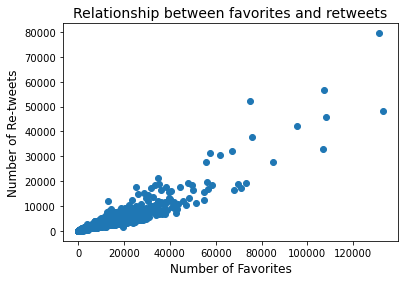

In [140]:
plt.scatter(x = tweets['favorite_count'], y = tweets['retweet_count']); 

plt.title('Relationship between favorites and retweets', fontsize = 14)
plt.xlabel('Number of Favorites', fontsize = 12)
plt.ylabel('Number of Re-tweets', fontsize = 12);

#### Finding
Given the scatter plot, the number of favorites has a fairly strong positive relationship with the number of retweets. Therefore, it is likely that dog tweets that gain popularity are likely to be shared (retweeted).

### `2.` Which breed is the most retweeted?

In [141]:
breed = tweets.groupby(by = ['breed']).mean()
breed_retweeted = breed['retweet_count'].sort_values()

In [142]:
breed_retweeted[1:10]

breed
Groenendael                     276.500000
Brabancon_Griffon               287.666667
Japanese_Spaniel                471.000000
Tibetan_Terrier                 557.750000
Entlebucher                     706.000000
Lhasa                           759.750000
Rhodesian_Ridgeback             769.000000
Irish_Wolfhound                 819.000000
Toy_Terrier                     834.333333
Dandie_Dinmont                  856.833333
Scottish_Deerhound              872.750000
Basenji                         890.111111
Standard_Schnauzer              928.000000
Miniature_Schnauzer             936.600000
Miniature_Poodle                975.250000
Soft-Coated_Wheaten_Terrier    1005.076923
Welsh_Springer_Spaniel         1106.000000
Redbone                        1113.000000
Cairn                          1130.333333
Curly-Coated_Retriever         1208.333333
Maltese_Dog                    1238.263158
Sussex_Spaniel                 1239.000000
Scotch_Terrier                 1250.000000
Papil

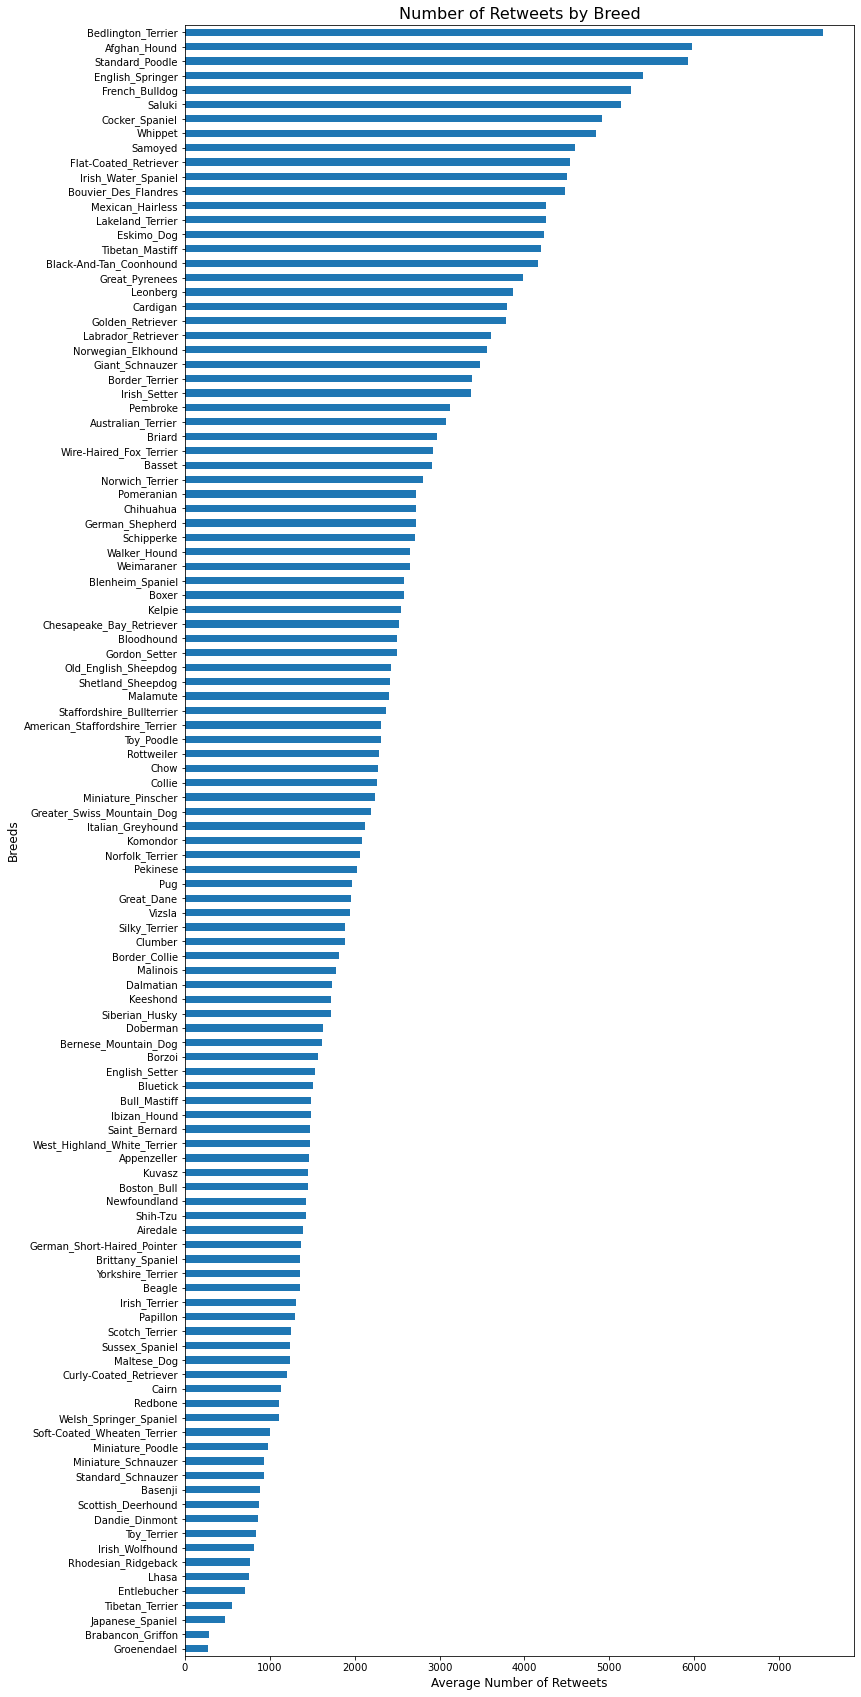

In [143]:
plt.figure(figsize = [12, 30])
breed_retweeted.plot(kind = 'barh');

plt.title('Number of Retweets by Breed', fontsize = 16)
plt.xlabel('Average Number of Retweets', fontsize = 12)
plt.ylabel('Breeds', fontsize = 12);

#### Simplify to Top 20 only 

In [144]:
top20_retweeted = breed_retweeted.nlargest(20).sort_values()

In [145]:
top20_retweeted.sum() / breed_retweeted.sum() # 36% of the total

0.35605526397699294

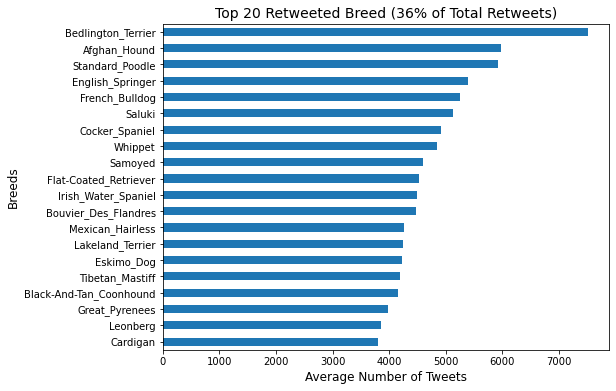

In [146]:
plt.figure(figsize = [8,6])
top20_retweeted.plot(kind = 'barh');

plt.title('Top 20 Retweeted Breed (36% of Total Retweets)', fontsize = 14)
plt.xlabel('Average Number of Tweets', fontsize = 12)
plt.ylabel('Breeds', fontsize = 12);

#### Finding

The most retweeted dog breeds is Bedlington Terrier (7510 retweets on average). Afghan Hound, Standard Poodle, English Springer and French Bulldogs follow the next in retweets. 

Given the strong, positive relationship between retweets and favorites (likes), posts related to Bedlington Terrier is likely to be favored on Twitter.

### `3.` Does the most retweeted breeds have high ratings as well?

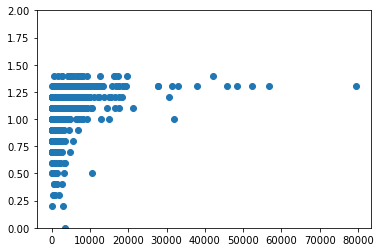

In [147]:
plt.scatter(data = tweets, x = 'retweet_count', y = 'rating');
plt.ylim(0, 2); # removing outliers 

In [156]:
rating_summary = dict(breed.rating.describe())
rating_summary

{'count': 113.0,
 'mean': 1.0767455768509495,
 'std': 0.1821772400665678,
 'min': 0.5,
 '25%': 1.0,
 '50%': 1.0705882352941176,
 '75%': 1.1272727272727272,
 'max': 2.7}

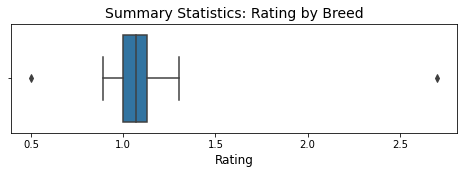

In [176]:
plt.figure(figsize = [8,2])

sns.boxplot(breed.rating);
plt.title('Summary Statistics: Rating by Breed', fontsize = 14)
plt.xlabel('Rating', fontsize = 12);


In [149]:
top20_retweet = breed.nlargest(n = 20, columns = 'retweet_count')
top20_retweet = top20_retweet.sort_values(by = 'retweet_count')

In [150]:
top20_retweet_rating = top20_retweet['rating']

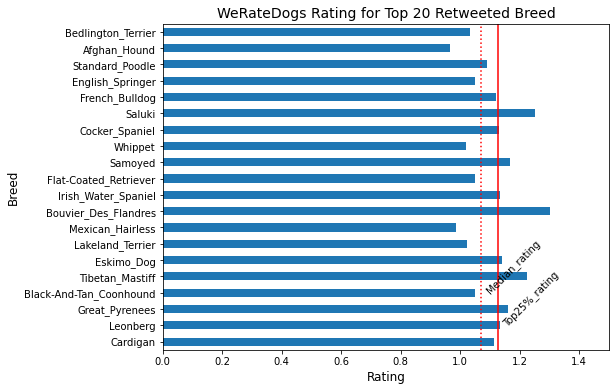

In [151]:
plt.figure(figsize = [8,6])
top20_retweet_rating.plot(kind = 'barh')

plt.title('WeRateDogs Rating for Top 20 Retweeted Breed', fontsize = 14)
plt.xlabel('Rating', fontsize = 12)
plt.ylabel('Breed', fontsize = 12)

plt.xlim(0,1.5);
plt.axvline(x = rating_summary['75%'], color = 'red', linestyle = '-')
plt.axvline(x = rating_summary['50%'], color = 'red', linestyle = ':')
plt.text(rating_summary['75%'] + 0.01, 1, 'Top25%_rating', rotation = 45)
plt.text(rating_summary['50%'] + 0.01, 3, 'Median_rating', rotation = 45);

#### Finding

The most retweeted is Bedlington Terrior. However, the breed has received lower than median rating on average. Afghan Hound and English Springer are also below median rating. The rest of the Top 5 most retweeted breeds (Standard Poodle and French Bulldogs) are above the median rating but not even within Top 20% in terms of WeRateDogs rating.

In [152]:
top20_index = list(top20_retweet.index)
top20_index

['Cardigan',
 'Leonberg',
 'Great_Pyrenees',
 'Black-And-Tan_Coonhound',
 'Tibetan_Mastiff',
 'Eskimo_Dog',
 'Lakeland_Terrier',
 'Mexican_Hairless',
 'Bouvier_Des_Flandres',
 'Irish_Water_Spaniel',
 'Flat-Coated_Retriever',
 'Samoyed',
 'Whippet',
 'Cocker_Spaniel',
 'Saluki',
 'French_Bulldog',
 'English_Springer',
 'Standard_Poodle',
 'Afghan_Hound',
 'Bedlington_Terrier']

---
This is the end of the notebook. If you want to return to Table of Contents, please click [here](#workflow).